In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [47]:
skodata = pd.read_csv('coordinatesusecases.csv')


In [48]:
skodata.head()


,account_name,opportunity_type,first_purchase_year,edx_percentage,cdx_percentage,wan_percentage,x_axis_coordinate,y_axis_coordinate,won_bookings
0,Chimney Group,New,2018,0.000000,0.0,1.000000,50,86,1750.00000
1,Lloyds Banking Group,New,2017,0.333333,0.5,0.166667,25,1,15749.99574
2,Royal Dutch Shell,Renewal Expansion,2018,1.000000,0.0,0.000000,0,0,15900.00000
3,RSM US LLP,New,2018,0.000000,0.0,1.000000,50,86,1750.00000
4,Investec,New,2019,1.000000,0.0,0.000000,0,0,23875.00000


In [49]:
skodata.describe()

,first_purchase_year,edx_percentage,cdx_percentage,wan_percentage,x_axis_coordinate,y_axis_coordinate,won_bookings
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2018.245455,0.340711,0.422327,0.236962,52.727273,19.518182,9054.531379
std,0.877797,0.390690,0.433428,0.341966,37.675837,30.153559,14602.058500
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000
25%,2018.000000,0.000000,0.000000,0.000000,25.000000,0.000000,3000.000000
50%,2018.000000,0.225000,0.375000,0.000000,50.000000,0.000000,4050.000000
75%,2019.000000,0.500000,1.000000,0.500000,100.000000,43.000000,10000.000000
max,2020.000000,1.000000,1.000000,1.000000,100.000000,86.000000,159800.000000


In [50]:
import random
import decimal
skodata['xspreadfloat'] = [random.randrange(-1000,1000)/100 for k in skodata.index]
skodata['yspreadfloat'] = [random.randrange(-1000,1000)/100 for k in skodata.index]
skodata['adjusted_x_axis'] = skodata['x_axis_coordinate']+skodata['xspreadfloat']

cols = ['first_purchase_year']
skodata[cols] = skodata[cols].applymap(np.int64)
skodata.head()

,account_name,opportunity_type,first_purchase_year,edx_percentage,cdx_percentage,wan_percentage,x_axis_coordinate,y_axis_coordinate,won_bookings,xspreadfloat,yspreadfloat,adjusted_x_axis
0,Chimney Group,New,2018,0.000000,0.0,1.000000,50,86,1750.00000,-7.61,-2.59,42.39
1,Lloyds Banking Group,New,2017,0.333333,0.5,0.166667,25,1,15749.99574,8.11,6.39,33.11
2,Royal Dutch Shell,Renewal Expansion,2018,1.000000,0.0,0.000000,0,0,15900.00000,2.03,-0.75,2.03
3,RSM US LLP,New,2018,0.000000,0.0,1.000000,50,86,1750.00000,-8.81,-6.66,41.19
4,Investec,New,2019,1.000000,0.0,0.000000,0,0,23875.00000,2.38,6.05,2.38


In [55]:
skodata['adjusted_y_axis'] = skodata['y_axis_coordinate']+skodata['yspreadfloat']
skodata['adjusted_bookings_size'] = skodata['won_bookings']*1000000
skodata.head()

,account_name,opportunity_type,first_purchase_year,edx_percentage,cdx_percentage,wan_percentage,x_axis_coordinate,y_axis_coordinate,won_bookings,xspreadfloat,yspreadfloat,adjusted_x_axis,adjusted_y_axis,adjusted_bookings_size
0,Chimney Group,New,2018,0.000000,0.0,1.000000,50,86,1750.00000,-7.61,-2.59,42.39,83.41,1.750000e+09
1,Lloyds Banking Group,New,2017,0.333333,0.5,0.166667,25,1,15749.99574,8.11,6.39,33.11,7.39,1.575000e+10
2,Royal Dutch Shell,Renewal Expansion,2018,1.000000,0.0,0.000000,0,0,15900.00000,2.03,-0.75,2.03,-0.75,1.590000e+10
3,RSM US LLP,New,2018,0.000000,0.0,1.000000,50,86,1750.00000,-8.81,-6.66,41.19,79.34,1.750000e+09
4,Investec,New,2019,1.000000,0.0,0.000000,0,0,23875.00000,2.38,6.05,2.38,6.05,2.387500e+10


In [56]:
import seaborn as sns
newdata= skodata[skodata['opportunity_type'] == 'New']
renewalexpansiondata = skodata[skodata['opportunity_type'] == 'Renewal Expansion']


In [57]:
data = skodata


No handles with labels found to put in legend.


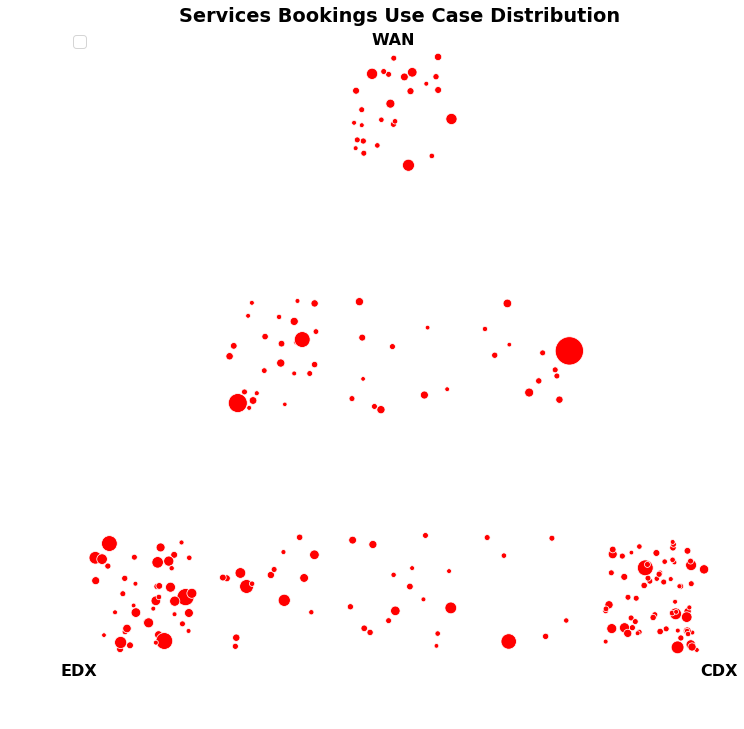

In [69]:
if len(data) == len(newdata):
    label = 'Use Case Distribution by Account by New'
    palette = 'viridis'
elif len(data) == len(skodata):
    label = 'Services Bookings Use Case Distribution'
    palette = 'viridis'
else:
    label='UC'
    palette= 'summer'
     
plt.rc('font', size=16)
plt.figure(figsize=(12,12))
plt.figtext(0.12,0.13,'Use Case #1', weight=1000)
plt.figtext(0.86,0.13,'Use Case #2', weight = 1000)
plt.figtext(0.48,0.86,'Use Case #3', weight =1000)
plt.title(label,fontdict=None,loc='center',weight=1000)
plt.legend(loc='upper left',frameon=True)
plt.axis('off')
sns.scatterplot(x="adjusted_x_axis", y="adjusted_y_axis",
                size = "adjusted_bookings_size", data = data, color='r',legend=False,
                sizes=(20,800))
